In [123]:
import pandas as pd
import numpy as np

# do a preliminary read of the csv and attempt to parse column types
dev_2017_pre = pd.read_csv('consumption_deviation_FR_new.csv', sep=';', decimal=',', parse_dates=['timestamp'])

print(dev_2017_pre)

# since the quantity column is parsed generically as object, 
# it likely includes some anomalous (e.g. missing) values 
print(dev_2017_pre.dtypes)

                timestamp      quantity
0     2017-01-01 00:00:00       -44,875
1     2017-01-01 00:30:00       -18,125
2     2017-01-01 01:00:00       -10,375
3     2017-01-01 01:30:00         7,125
4     2017-01-01 02:00:00       -43,375
...                   ...           ...
17535 2017-12-31 22:45:00  -21,48982889
17536 2017-12-31 23:00:00  -7,807809406
17537 2017-12-31 23:15:00  -56,69726053
17538 2017-12-31 23:30:00   21,83256871
17539 2017-12-31 23:45:00   4,452218702

[17540 rows x 2 columns]
timestamp    datetime64[ns]
quantity             object
dtype: object


In [3]:
# rows indices 13594, 13595, 13596 are missing values for deviation
print(dev_2017_pre[dev_2017_pre['quantity']=='na'])


                timestamp quantity
13594 2017-11-10 16:00:00       na
13595 2017-11-10 16:30:00       na
13596 2017-11-10 17:00:00       na


In [4]:
# since only few rows contain missing quantity values, 
# we just load the csv again skipping them
# use 
dev_2017 = pd.read_csv('consumption_deviation_FR_new.csv', sep=';', decimal=',', parse_dates=['timestamp'], skiprows=range(13595,13598))

# check that rows with missing quantity values have been removed
# print(dev_2017[dev_2017['quantity']=='na'])

# another ignored option: filter the loaded dataframe directly.
# however, here we would need to replace commas
# by periods as decimal separators in order to be
# able to parse them as floats

# dev_2017 = dev_2017_pre.loc[dev_2017_pre['quantity']!='na']

In [5]:
# the column types are now correctly parsed
dev_2017.dtypes

timestamp    datetime64[ns]
quantity            float64
dtype: object

In [6]:
# there seem to be some extreme outliers
dev_2017.describe()

,quantity
count,1.753700e+04
mean,-7.852510e+03
std,7.435333e+05
min,-7.898546e+07
25%,-3.087500e+01
50%,2.875000e+00
75%,3.875000e+01
max,5.651250e+02


In [8]:
# look for the timestamps corresponding to these extremes
dev_2017.set_index('timestamp', inplace=True, drop=True)
dev_2017.loc[dev_2017.idxmin()]

KeyError: "None of ['timestamp'] are in the columns"

In [9]:
# the maximum value is not as absurd as the minimum, so no
# need to drop it

dev_2017.loc[dev_2017.idxmax()]

,quantity
timestamp,
2017-07-12 04:30:00,565.125


In [10]:
# the entry corresponding to the minimum value is suspicious
# as there don't exist news of massive energy consumption 
# in france on that date. let's drop it from the dataframe

# i should drop outliers more systematically, like with a 
# lambda function
dev_2017.drop(dev_2017.idxmin(), inplace=True)


In [11]:
# the new minimum is also suspicious, let's drop it as well
dev_2017.loc[dev_2017.idxmin()]

,quantity
timestamp,
2017-11-05 04:00:00,-58796353.0


In [12]:
dev_2017.drop(dev_2017.idxmin(), inplace=True)

In [13]:
# the resulting minimum seems more realistic, so we'll keep it

dev_2017.loc[dev_2017.idxmin()]

,quantity
timestamp,
2017-01-25 13:00:00,-340.75


<AxesSubplot:xlabel='timestamp'>

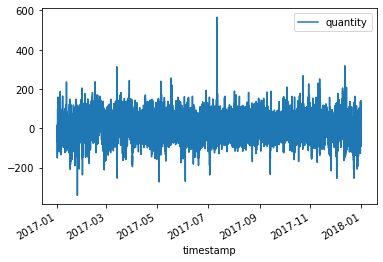

In [15]:
# now let's have a look at the time series. it would be
# unintelligible if we hadn't removed the outliers
dev_2017.plot()

In [42]:
# since we are interested in the relation between average 
# consumption and average temperature on a half-hourly basis,
# aggregate the consumption data. this will only affect the 
# rows for the last day of the year, which have a quarter-hourly 
# granularity as opposed to the half-hourly of the remaining
# rows, and will re-introduce the rows we excluded earlier
# for being outliers, now with value NaN, so we should look out
dev_2017_half = dev_2017.resample('30T').mean()
dev_2017_half.tail(10)

,quantity
timestamp,
2017-12-31 19:00:00,16.647287
2017-12-31 19:30:00,-9.012571
2017-12-31 20:00:00,33.898761
2017-12-31 20:30:00,-4.562091
2017-12-31 21:00:00,-20.452765
2017-12-31 21:30:00,-34.302923
2017-12-31 22:00:00,67.119462
2017-12-31 22:30:00,7.185383
2017-12-31 23:00:00,-32.252535


In [43]:
dev_2017_half.loc['2017-11-05']

,quantity
timestamp,
2017-11-05 00:00:00,-27.875
2017-11-05 00:30:00,24.250
2017-11-05 01:00:00,-23.250
2017-11-05 01:30:00,25.250
2017-11-05 02:00:00,2.375
2017-11-05 02:30:00,2.625
2017-11-05 03:00:00,-10.375
2017-11-05 03:30:00,-28.250
2017-11-05 04:00:00,NaN


<AxesSubplot:xlabel='timestamp'>

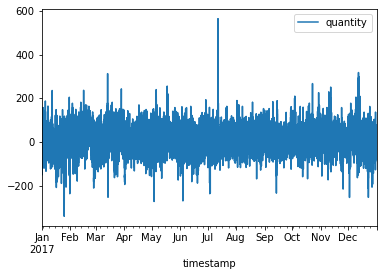

In [44]:
dev_2017_half.plot()

In [91]:
dev_2017_half.index

DatetimeIndex(['2017-01-01 00:00:00', '2017-01-01 00:30:00',
               '2017-01-01 01:00:00', '2017-01-01 01:30:00',
               '2017-01-01 02:00:00', '2017-01-01 02:30:00',
               '2017-01-01 03:00:00', '2017-01-01 03:30:00',
               '2017-01-01 04:00:00', '2017-01-01 04:30:00',
               ...
               '2017-12-31 19:00:00', '2017-12-31 19:30:00',
               '2017-12-31 20:00:00', '2017-12-31 20:30:00',
               '2017-12-31 21:00:00', '2017-12-31 21:30:00',
               '2017-12-31 22:00:00', '2017-12-31 22:30:00',
               '2017-12-31 23:00:00', '2017-12-31 23:30:00'],
              dtype='datetime64[ns]', name='timestamp', length=17520, freq='30T')

In [30]:
# let us now data corresponding to temperatures
# first i will restrict to data from a station 
# close to paris, named LFPB

paris_temp_2017_pre = pd.read_csv('LFPB.txt', skiprows=5, parse_dates=True, usecols=['valid', 'tmpc'], index_col='valid')

In [31]:
paris_temp_2017_pre.head(10)

,tmpc
valid,
2017-01-01 00:00:00,-3.0
2017-01-01 00:30:00,-3.0
2017-01-01 01:00:00,-3.0
2017-01-01 01:30:00,-3.0
2017-01-01 02:00:00,-3.0
2017-01-01 02:30:00,-3.0
2017-01-01 03:00:00,-3.0
2017-01-01 03:30:00,-3.0
2017-01-01 04:00:00,-4.0


In [32]:
paris_temp_2017_pre.dtypes

tmpc    float64
dtype: object

In [33]:
paris_temp_2017_pre.index

DatetimeIndex(['2017-01-01 00:00:00', '2017-01-01 00:30:00',
               '2017-01-01 01:00:00', '2017-01-01 01:30:00',
               '2017-01-01 02:00:00', '2017-01-01 02:30:00',
               '2017-01-01 03:00:00', '2017-01-01 03:30:00',
               '2017-01-01 04:00:00', '2017-01-01 06:00:00',
               ...
               '2017-12-30 19:00:00', '2017-12-30 19:30:00',
               '2017-12-30 20:00:00', '2017-12-30 20:30:00',
               '2017-12-30 21:00:00', '2017-12-30 21:30:00',
               '2017-12-30 22:00:00', '2017-12-30 22:30:00',
               '2017-12-30 23:00:00', '2017-12-30 23:30:00'],
              dtype='datetime64[ns]', name='valid', length=17167, freq=None)

In [34]:
# since we are interested in consumption data on a half-hourly
# basis, we need to make sure this is the granularity of the
# temperature data as well. for this, we can fill missing values
# values via forward fill, as we don't expect much temperature
# variation on short time intervals

paris_temp_2017 = paris_temp_2017_pre.asfreq('30T', method='ffill')



In [37]:
paris_temp_2017.head(10)

,tmpc
valid,
2017-01-01 00:00:00,-3.0
2017-01-01 00:30:00,-3.0
2017-01-01 01:00:00,-3.0
2017-01-01 01:30:00,-3.0
2017-01-01 02:00:00,-3.0
2017-01-01 02:30:00,-3.0
2017-01-01 03:00:00,-3.0
2017-01-01 03:30:00,-3.0
2017-01-01 04:00:00,-4.0


In [61]:
# let's do the same with the historical temperature data from
# the same weather station near paris, which comprises measurements
# from 2010 to 2016

paris_temp_hist_pre = pd.read_csv('LFPB_historical.txt', skiprows=5, parse_dates=True, usecols=['valid', 'tmpc'], index_col='valid')

In [62]:
paris_temp_hist_pre.head(10)

,tmpc
valid,
2010-01-01 00:00:00,1.0
2010-01-01 00:30:00,1.0
2010-01-01 01:00:00,1.0
2010-01-01 01:30:00,1.0
2010-01-01 02:00:00,1.0
2010-01-01 02:30:00,1.0
2010-01-01 03:00:00,1.0
2010-01-01 03:30:00,0.0
2010-01-01 04:00:00,0.0


In [66]:
# uniformize the granularity of this dataset
# here asfreq or resample don't work because it says there are 
# nonunique index values

# this is because apparently index_cols doesn't check 
# for uniqueness of index values, as illustrated below

paris_temp_hist = paris_temp_hist_pre.resample('30T').ffill()

ValueError: cannot reindex a non-unique index with a method or limit

In [67]:
paris_temp_hist_pre[paris_temp_hist_pre.index.duplicated()]

,tmpc
valid,
2010-03-28 22:00:00,12.0
2010-03-28 22:30:00,12.0
2010-07-30 22:00:00,22.0
2010-07-30 22:30:00,21.0
2010-07-30 23:00:00,21.0
2010-07-30 23:30:00,20.0
2011-03-27 22:00:00,10.0
2011-03-27 22:30:00,10.0
2011-07-30 22:00:00,15.0


In [68]:
paris_temp_hist_pre.loc['2010-03-28 22:00:00']

,tmpc
valid,
2010-03-28 22:00:00,12.0
2010-03-28 22:00:00,12.0


In [77]:
# let's re-read the csv without setting the index column
paris_temp_hist_pre = pd.read_csv('LFPB_historical.txt', skiprows=5, parse_dates=['valid'], usecols=['valid', 'tmpc']).drop_duplicates('valid', keep='first').set_index('valid')

In [78]:
paris_temp_hist_pre.index

DatetimeIndex(['2010-01-01 00:00:00', '2010-01-01 00:30:00',
               '2010-01-01 01:00:00', '2010-01-01 01:30:00',
               '2010-01-01 02:00:00', '2010-01-01 02:30:00',
               '2010-01-01 03:00:00', '2010-01-01 03:30:00',
               '2010-01-01 04:00:00', '2010-01-01 04:30:00',
               ...
               '2016-12-30 19:00:00', '2016-12-30 19:30:00',
               '2016-12-30 20:00:00', '2016-12-30 20:30:00',
               '2016-12-30 21:00:00', '2016-12-30 21:30:00',
               '2016-12-30 22:00:00', '2016-12-30 22:30:00',
               '2016-12-30 23:00:00', '2016-12-30 23:30:00'],
              dtype='datetime64[ns]', name='valid', length=121035, freq=None)

In [79]:
paris_temp_hist_pre

,tmpc
valid,
2010-01-01 00:00:00,1.0
2010-01-01 00:30:00,1.0
2010-01-01 01:00:00,1.0
2010-01-01 01:30:00,1.0
2010-01-01 02:00:00,1.0
...,...
2016-12-30 21:30:00,-3.0
2016-12-30 22:00:00,-3.0
2016-12-30 22:30:00,-3.0


In [80]:
# now we can make sure the granularity is 30 minutes

paris_temp_hist = paris_temp_hist_pre.resample('30T').ffill()

In [81]:
paris_temp_hist.index

DatetimeIndex(['2010-01-01 00:00:00', '2010-01-01 00:30:00',
               '2010-01-01 01:00:00', '2010-01-01 01:30:00',
               '2010-01-01 02:00:00', '2010-01-01 02:30:00',
               '2010-01-01 03:00:00', '2010-01-01 03:30:00',
               '2010-01-01 04:00:00', '2010-01-01 04:30:00',
               ...
               '2016-12-30 19:00:00', '2016-12-30 19:30:00',
               '2016-12-30 20:00:00', '2016-12-30 20:30:00',
               '2016-12-30 21:00:00', '2016-12-30 21:30:00',
               '2016-12-30 22:00:00', '2016-12-30 22:30:00',
               '2016-12-30 23:00:00', '2016-12-30 23:30:00'],
              dtype='datetime64[ns]', name='valid', length=122688, freq='30T')

In [130]:
# we will start by generating an average value of the temperature
# for every half-hour of the year

paris_temp_avg = paris_temp_hist['tmpc'].groupby([paris_temp_hist.index.month, 
                                         paris_temp_hist.index.day, 
                                         paris_temp_hist.index.hour, 
                                         paris_temp_hist.index.minute]).agg([np.mean, np.std])

In [131]:
# this dataframe contains a bit too many half-hours because the year
# range comprises the leap years 2012 and 2016. since 2017 is not leap,
# we should exclude the leap days 
# (optimally, do the comparison based on whether the year to predict
# consumption for is leap or not)
paris_temp_avg

mean       std
valid valid valid valid                    
1     1     0     0      5.428571  5.255383
                  30     5.142857  5.398412
            1     0      5.000000  5.291503
                  30     4.857143  5.209881
            2     0      4.714286  5.154748
...                           ...       ...
12    31    21    30     6.000000  4.939636
            22    0      6.000000  5.440588
                  30     6.000000  5.291503
            23    0      6.000000  5.291503
                  30     6.166667  5.344779

[17568 rows x 2 columns]

In [126]:
# for the purpose of this draft, on the context of 2017, we force
# the granularity once more, this time filtering out the leap days

paris_temp_hist_leap = paris_temp_hist_pre.resample('30T').ffill()
paris_temp_hist=paris_temp_hist_leap.loc[~((paris_temp_hist_pre.index.month==2) & (paris_temp_hist_pre.index.day==29))]

# maybe it's not allowed to filter out entries at this point since 
# the index has an associated frequency

IndexError: Boolean index has wrong length: 121035 instead of 122688

In [127]:
paris_temp_hist

,tmpc
valid,
2010-01-01 00:00:00,1.0
2010-01-01 00:30:00,1.0
2010-01-01 01:00:00,1.0
2010-01-01 01:30:00,1.0
2010-01-01 02:00:00,1.0
...,...
2016-12-30 21:30:00,-3.0
2016-12-30 22:00:00,-3.0
2016-12-30 22:30:00,-3.0


In [128]:
# and lets aggregate on a half-hour basis, ignoring year,
# once more, to check that excluding the leap day gives
# the correct number of halfhours in a year

# this doesn't work either for the same reason as above

paris_temp_avg = paris_temp_hist.loc[~((paris_temp_hist_pre.index.month==2) & (paris_temp_hist_pre.index.day==29))].groupby([paris_temp_hist.index.month, 
                                         paris_temp_hist.index.day, 
                                         paris_temp_hist.index.hour, 
                                         paris_temp_hist.index.minute]).mean()

IndexError: Boolean index has wrong length: 121035 instead of 122688

In [129]:
paris_temp_avg.loc[~((paris_temp_avg.index.get_level_values(0)==2) & (paris_temp_avg.index.get_level_values(1)==29))]

tmpc          
                             mean       std
valid valid valid valid                    
1     1     0     0      5.428571  5.255383
                  30     5.142857  5.398412
            1     0      5.000000  5.291503
                  30     4.857143  5.209881
            2     0      4.714286  5.154748
...                           ...       ...
12    31    21    30     6.000000  4.939636
            22    0      6.000000  5.440588
                  30     6.000000  5.291503
            23    0      6.000000  5.291503
                  30     6.166667  5.344779

[17520 rows x 2 columns]